## 📥 1. Data Loading & Initial Exploration

In this section, we import the Steam dataset and explore its structure.  
We look at data types, missing values, and basic statistics to understand what we're working with.

## 🧹 2. Data Cleaning & Preprocessing

We clean the dataset by:
- Converting the release date into datetime format
- Filtering out games with missing prices or no playtime
- Creating new columns like total ratings, positive rating ratio
- Grouping rare genres into 'Other'
- Creating platform flags for Windows, Mac, and Linux
This step ensures we’re only analyzing valid, complete, and comparable game entries.


In [6]:
# Steam Games Data Analysis
# Jupyter Notebook Template

## Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data Loading and Initial Exploration
# Load the dataset
df = pd.read_csv('steam.csv')

## 2. Data Cleaning and Preprocessing
# Handle missing values if any
df = df.dropna()  # or other imputation methods

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year from release_date
df['release_year'] = df['release_date'].dt.year

# Create a new column for total ratings
df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']

# Create a new column for rating percentage
df['rating_percentage'] = (df['positive_ratings'] / df['total_ratings']) * 100

# Clean up platform info
df['windows'] = df['platforms'].str.contains("windows", case=False)
df['mac'] = df['platforms'].str.contains("mac", case=False)
df['linux'] = df['platforms'].str.contains("linux", case=False)

# Filter out free or missing price games (price = 0 or NaN)
df = df[df['price'].notna() & (df['price'] > 0)]

# Define engagement proxy as average playtime (filter outliers)
df = df[df['average_playtime'] > 0]
df = df[df['average_playtime'] < df['average_playtime'].quantile(0.99)]

# Group rarely occurring genres into 'Other'
top_genres = df['genres'].value_counts().nlargest(20).index
df['genre_group'] = df['genres'].apply(lambda g: g if g in top_genres else 'Other')

# Print text
print("Here is an overview of the dataset:")

# Display cleaned data
display(df.head())



ModuleNotFoundError: No module named 'pandas'

## 📊 3. Exploratory Data Analysis (EDA)

This section uses visualizations to explore patterns and trends in the dataset.
We look at:
- How many games are released each year
- Price distribution
- Engagement by genre
- Price vs engagement
- Average engagement per platform


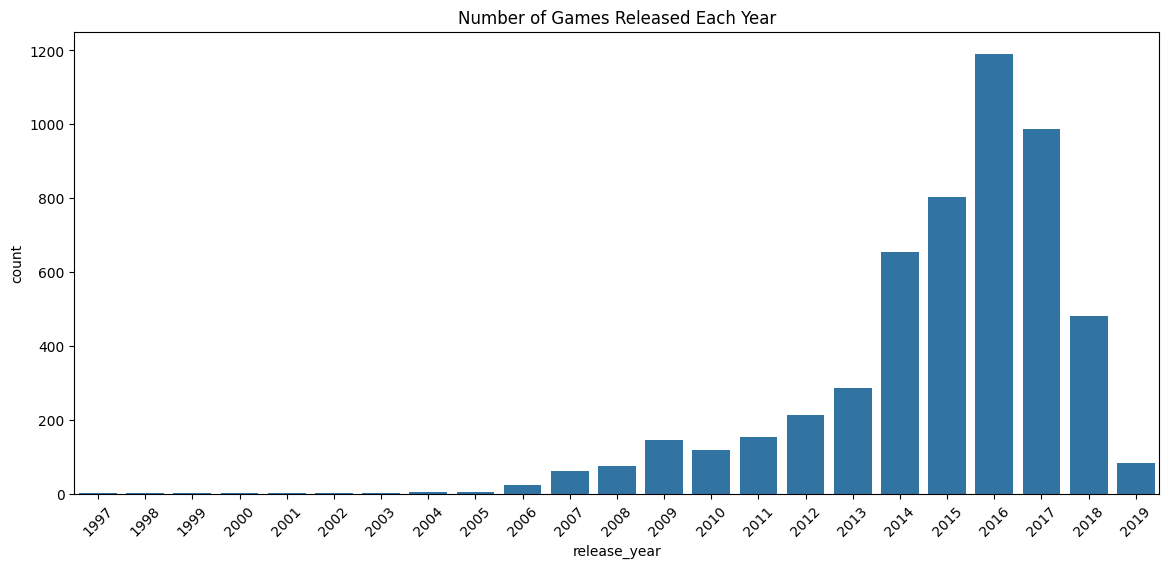

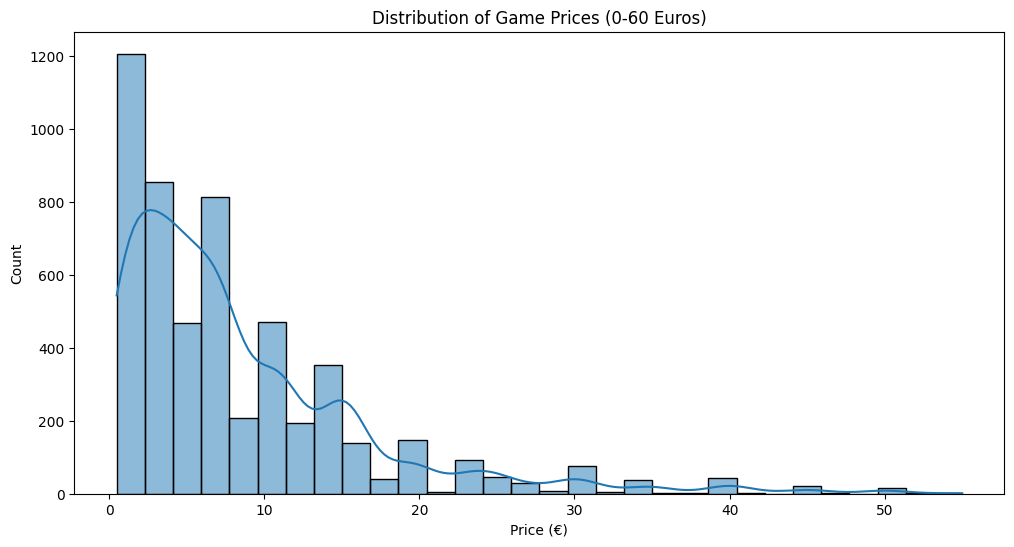

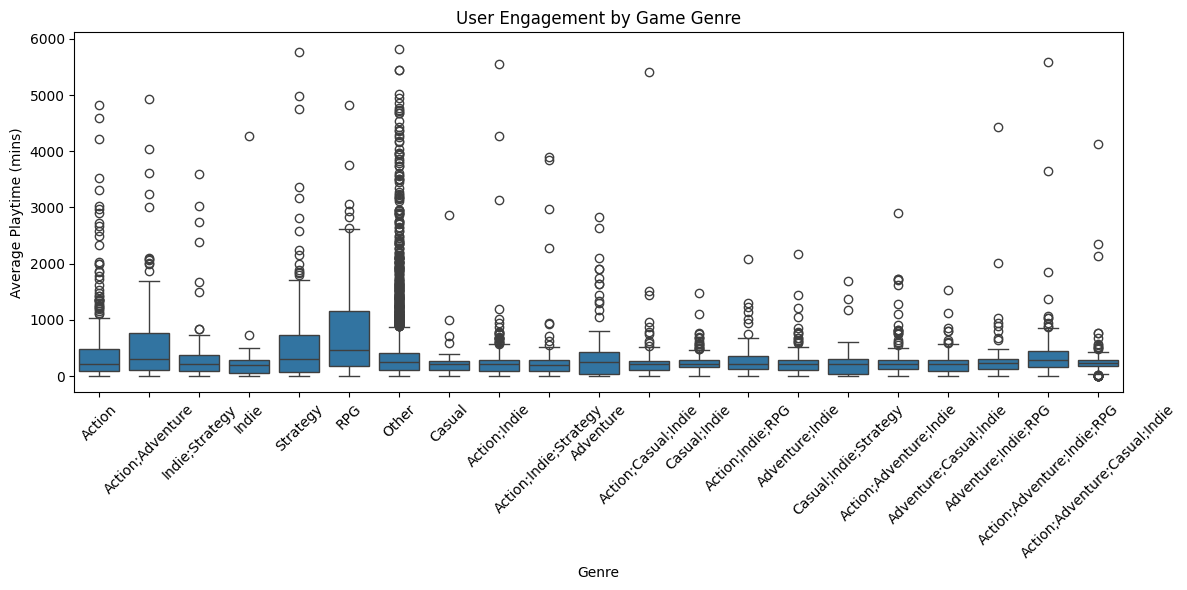

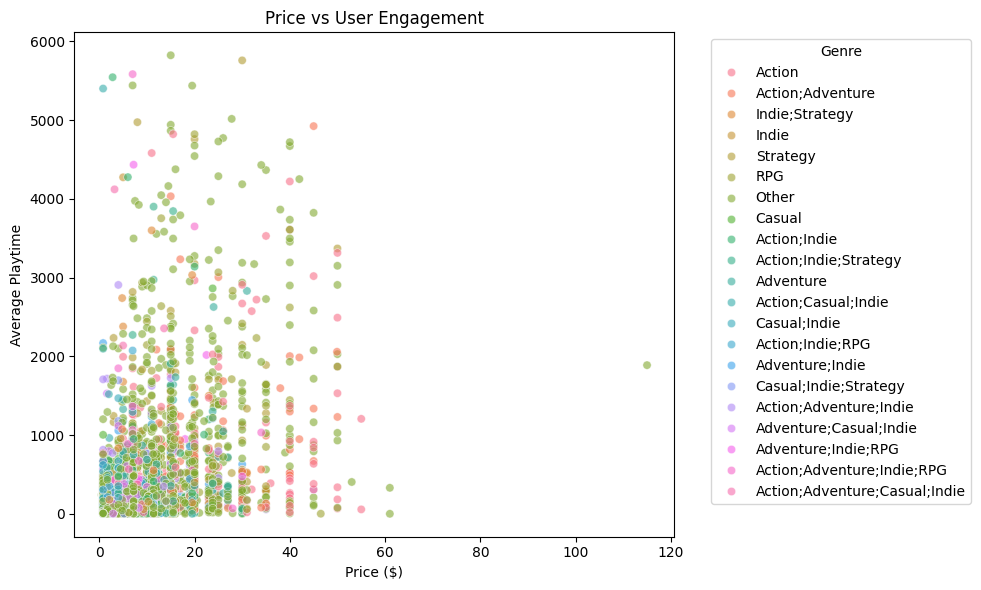

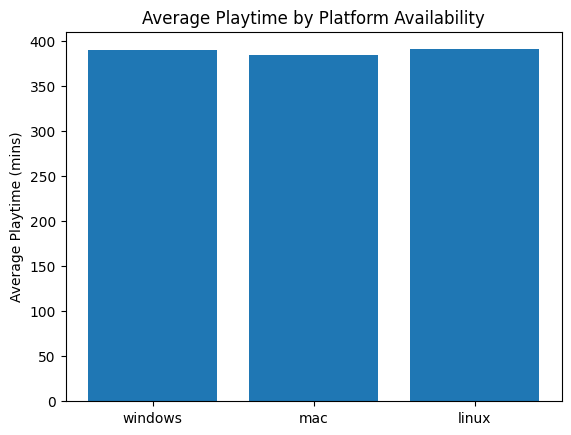

In [ ]:
## 3. Exploratory Data Analysis (EDA)
# Import matplotlib for visualization

### 3.1 Distribution of Games Over Time
plt.figure(figsize=(14, 6))
sns.countplot(x='release_year', data=df)
plt.title('Number of Games Released Each Year')
plt.xticks(rotation=45)
plt.show()

### 3.2 Price Distribution
# Filter the dataset for prices between 0 and 60
filtered_df = df[(df['price'] >= 0) & (df['price'] <= 60)]

plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['price'], bins=30, kde=True)
plt.title('Distribution of Game Prices (0-60 Euros)')
plt.xlabel('Price (€)')
plt.show()

# Summary visualization: average playtime by genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='genre_group', y='average_playtime')
plt.xticks(rotation=45)
plt.title('User Engagement by Game Genre')
plt.ylabel('Average Playtime (mins)')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

# Price vs Engagement
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='average_playtime', hue='genre_group', alpha=0.6)
plt.title('Price vs User Engagement')
plt.ylabel('Average Playtime')
plt.xlabel('Price ($)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Platforms and Engagement
platform_engagement = df[['windows', 'mac', 'linux', 'average_playtime']].copy()
platforms = ['windows', 'mac', 'linux']
means = {}

for p in platforms:
    means[p] = df[df[p]]['average_playtime'].mean()

plt.bar(means.keys(), means.values())
plt.title("Average Playtime by Platform Availability")
plt.ylabel("Average Playtime (mins)")
plt.show()


explanation
2016 was a record year for releasing games. This trend appeared to be rising, and then slowly falling back, with less games released each year. A possible explanation for the 2016 record, is the rise of cheap game building engines. 

the distribution of prices, is as following: free games occur the most, and as the price goes up, the game count is lower. Every round number, like 10, 20 etc has an increased count. This could be to make the price seem lower, like a discount.

The highest playtimes appear in genres like RPG, adventure or strategy. This could be because you get immersed into it, and forget the time. With these type of games, there often appear things like quests, or you need to obtain something in order to go further. The lowest playtime appears in games like casual or "action;adventure;indie;RPG". The casual one is explainable, you just want to play a simple game to pass the time, often not very deep. The "action;adventure;indie;RPG" could be that the developers tried to merge too much genres into a game. 

It appears that the higher the price, the lower the average playtime. However, this could be overshadowed by the fact that there are more games in the lower price range.

As we see, the platform does **not** have influence on the average playtime. There is a small indifference, but it is too small to be causational.

## ⭐ 4. Average User Ratings by Genre

We calculate the average positive rating percentage by game genre.
This shows which types of games are generally most liked by players.


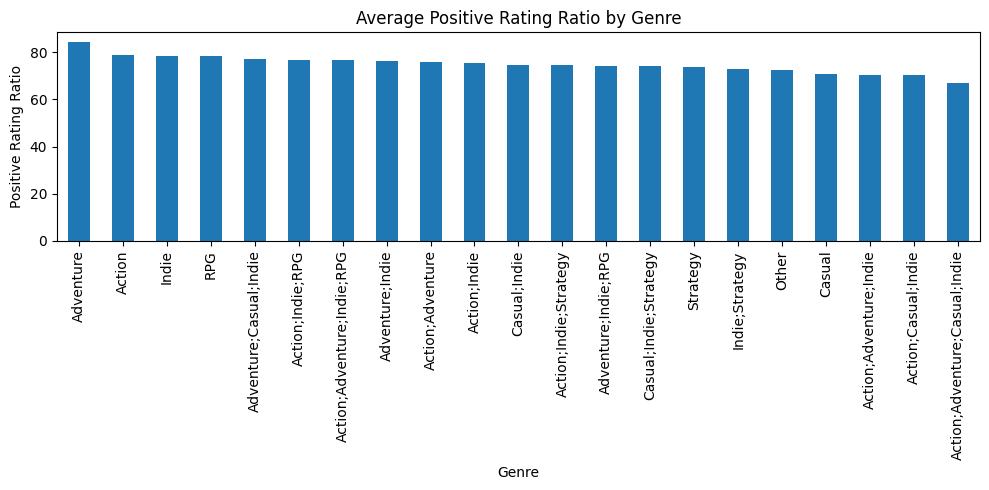

In [ ]:
# Ratings by genre
genre_ratings = df.groupby('genre_group')['rating_percentage'] \
    .mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
genre_ratings.plot(kind='bar')
plt.title('Average Positive Rating Ratio by Genre')
plt.ylabel('Positive Rating Ratio')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()


The ratings are very even across the genres. this could be because that games within each genre are generally assessed based on how well they meet the expectations of that genre — not compared to completely different genres.

## 💵 5. Price vs. User Ratings

We visualize the relationship between a game’s price and how positively it's reviewed.
We also group prices into bins (0–10, 10–20, etc.) to see how user ratings vary by price category.


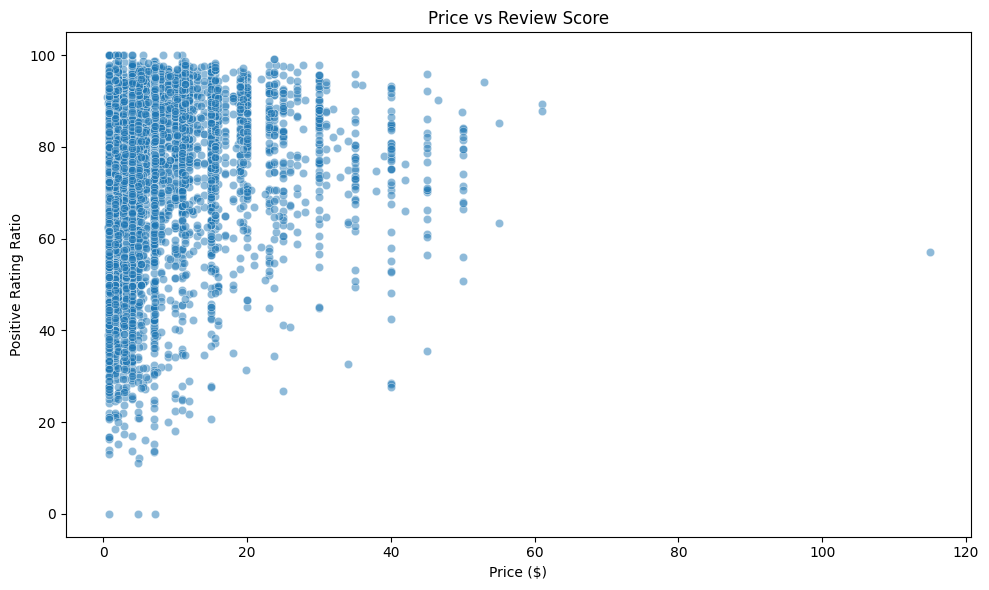

C:\Users\HP\AppData\Local\Temp\ipykernel_16084\2476558275.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_group = df.groupby('price_bin')['rating_percentage'].mean()


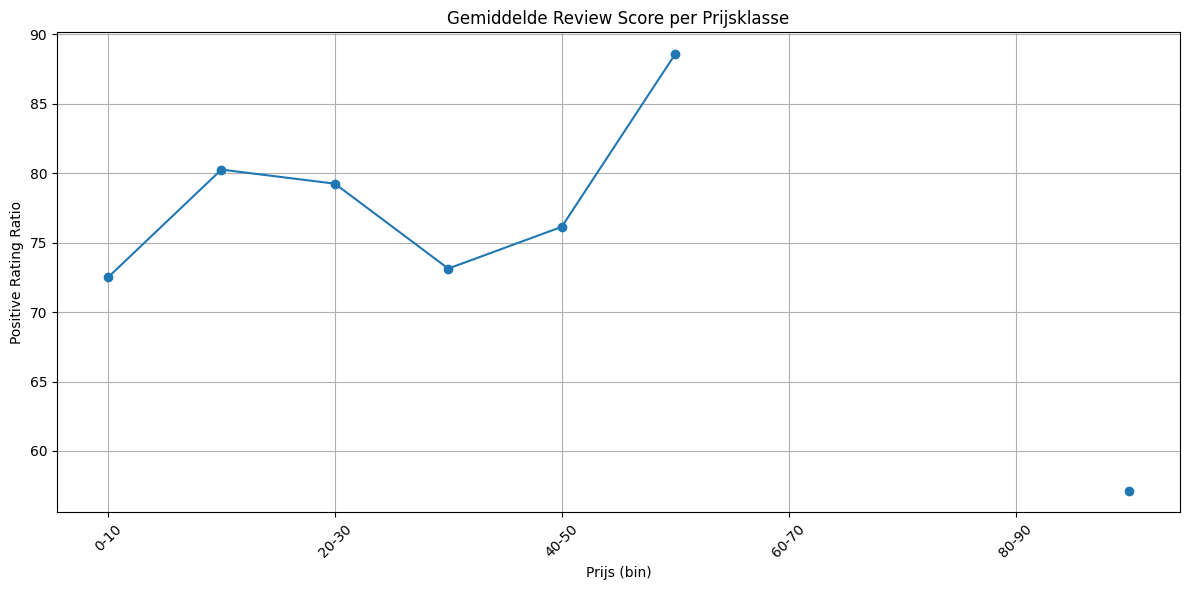

In [ ]:
# 1. Price vs Review Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='price',
    y='rating_percentage',
    alpha=0.5
)
plt.title('Price vs Review Score')
plt.xlabel('Price ($)')
plt.ylabel('Positive Rating Ratio')
plt.tight_layout()
plt.show()

# Prijs opdelen in gelijke klassen
df['price_bin'] = pd.cut(
    df['price'],
    bins=10,
    labels=[f"{i}-{i+10}" for i in range(0, 100, 10)],
    include_lowest=True
)

# Gemiddelde review score per prijsklasse berekenen
price_group = df.groupby('price_bin')['rating_percentage'].mean()

# Lijnplot maken
plt.figure(figsize=(12, 6))
price_group.plot(kind='line', marker='o')
plt.title('Gemiddelde Review Score per Prijsklasse')
plt.xlabel('Prijs (bin)')
plt.ylabel('Positive Rating Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



It appears that games with a lower price, have on average, a lower positive rating. This could be because games with a higher price, have generally more work in them. This could be overshadowed because there are way more games with a lower price. 

## Avg Playtime vs Review socre

In this section we will see if avg. playtime has an effect on review score

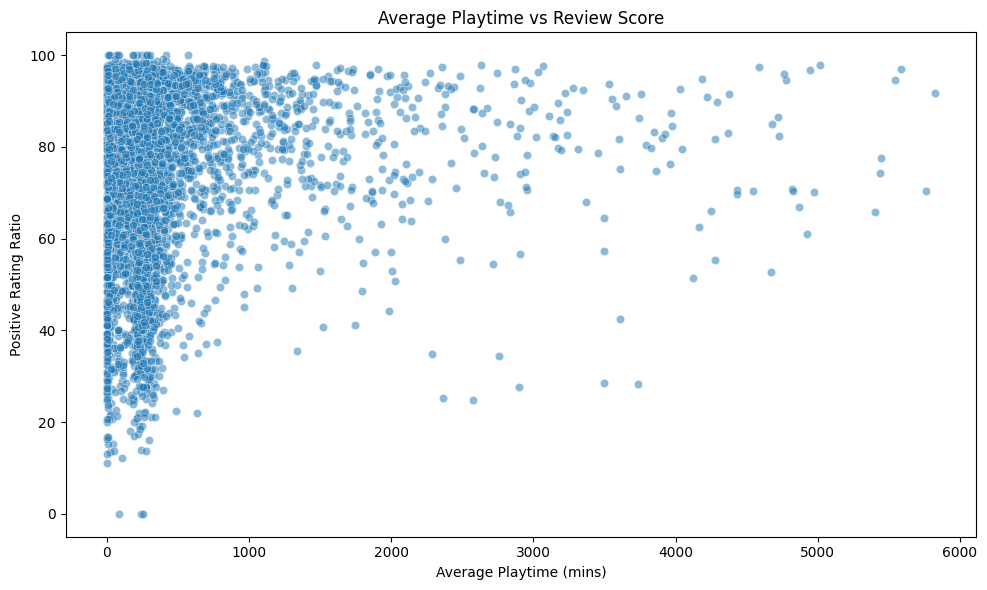

C:\Users\HP\AppData\Local\Temp\ipykernel_16084\2680308910.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  playtime_group = df.groupby('playtime_bin')['rating_percentage'].mean()


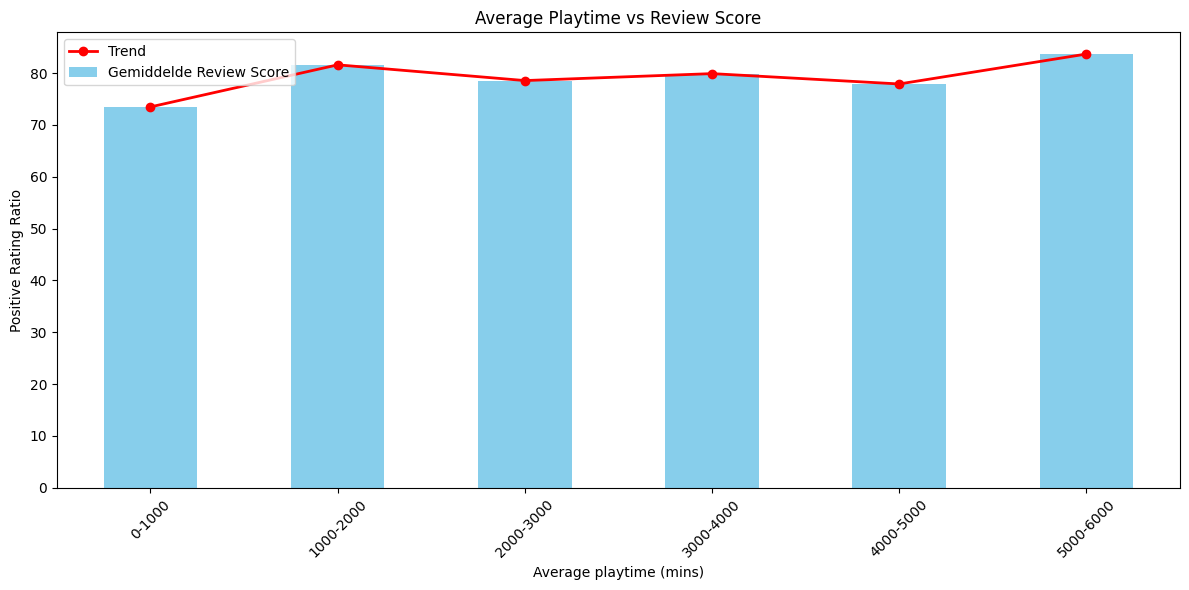

In [ ]:
# 2. Average Playtime vs Review Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='average_playtime',
    y='rating_percentage',
    alpha=0.5
)
plt.title('Average Playtime vs Review Score')
plt.xlabel('Average Playtime (mins)')
plt.ylabel('Positive Rating Ratio')
plt.tight_layout()
plt.show()

# Zelfde bins en labels als eerder
bins = list(range(0, 7000, 1000))
labels = [f"{i}-{i+1000}" for i in bins[:-1]]
df['playtime_bin'] = pd.cut(
    df['average_playtime'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Gemiddelde review score per speeltijd-bin
playtime_group = df.groupby('playtime_bin')['rating_percentage'].mean()

# Plotten: bars + lijn
plt.figure(figsize=(12, 6))
ax = playtime_group.plot(
    kind='bar',
    color='skyblue',
    label='Gemiddelde Review Score'
)

# Lijn over de bar toppen
plt.plot(
    range(len(playtime_group)),
    playtime_group.values,
    color='red',
    marker='o',
    linestyle='-',
    linewidth=2,
    label='Trend'
)

plt.title('Average Playtime vs Review Score')
plt.xlabel('Average playtime (mins)')
plt.ylabel('Positive Rating Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


It appears that the average playtime has little effect on the positive ratings. It appears that people who have played 0-1000 images gave slightly lower ratings. This is pretty logic, because if you do not like a game, you quit playing. This statistic could also be overshadowed by the fact that there are way more people that have a lower playtime, than a higher playtime.

## Categories vs review score

In this part we will see if the steam category has an effect on the review score

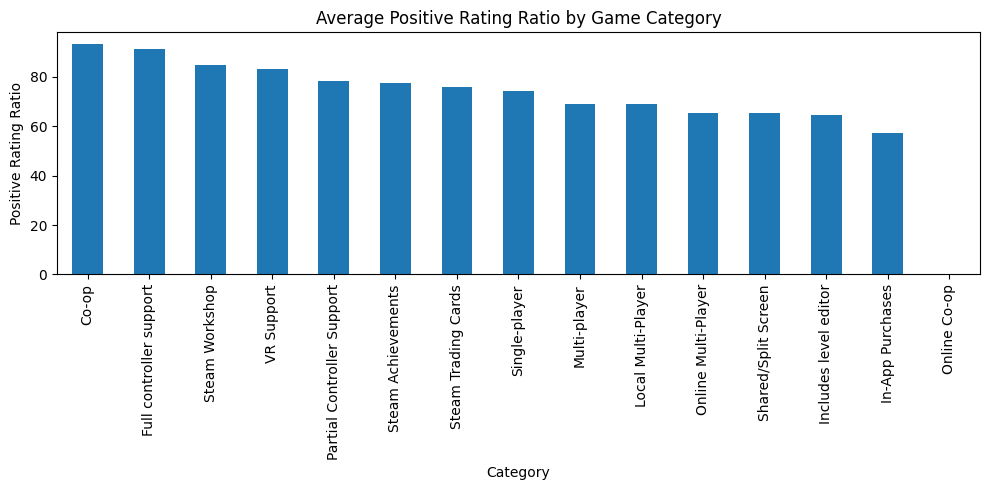

In [ ]:
# 3. Categories vs Review Score (top categories only)
df['primary_category'] = df['categories'].str.split(';').str[0]

top_categories = df['primary_category'].value_counts() \
    .nlargest(20).index

df['category_group'] = df['primary_category'].apply(
    lambda x: x if x in top_categories else 'Other'
)

category_ratings = df.groupby('category_group')['rating_percentage'] \
    .mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
category_ratings.plot(kind='bar')
plt.title('Average Positive Rating Ratio by Game Category')
plt.ylabel('Positive Rating Ratio')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


It appears that co-op games have the highest positive ratings. this could be because when you play with friends or other people, the games appear more fun. Games with in-app purchases appear to be lowest on the list. This could be because paying can cause an unfair advantage, which makes people want to quit and give a lower rating. It also appears to be very equally divided. This could be because stated before, each category are generally assessed based on how well they meet the expectations of that genre — not compared to completely different categories.

## 🧠 Analysis: Required Age vs. User Ratings

In this section, we examine whether games with higher age restrictions (e.g., 18+) receive higher or lower user ratings.
This may reflect the tone, complexity, or content of mature games.


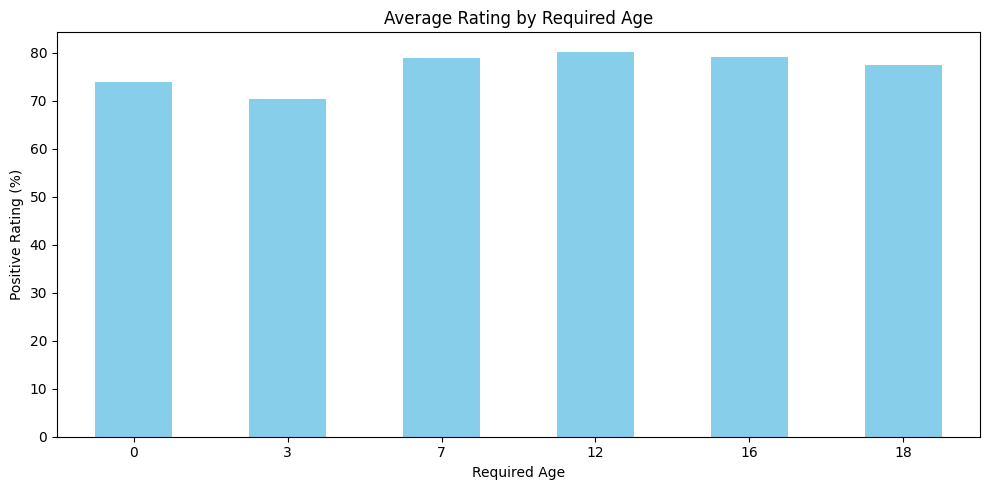

In [ ]:
age_ratings = df.groupby('required_age')['rating_percentage'].mean().sort_index()

plt.figure(figsize=(10, 5))
age_ratings.plot(kind='bar', color='skyblue')
plt.title("Average Rating by Required Age")
plt.xlabel("Required Age")
plt.ylabel("Positive Rating (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



There appears to be little difference in the average rating, for different age requirements. The age rating of a game (like PEGI 3, 12, 18, etc.) is based on content — such as violence, language, or mature themes — not on quality. So, a game made for young children can still be very well-designed and receive high ratings, just like a violent action game for adults.

## 🏆 Analysis: Achievements vs. User ratings

This section analyzes whether games with more achievements tend to have higher user engagement (measured by average playtime).
Achievements might encourage players to play longer or complete more in-game objectives.


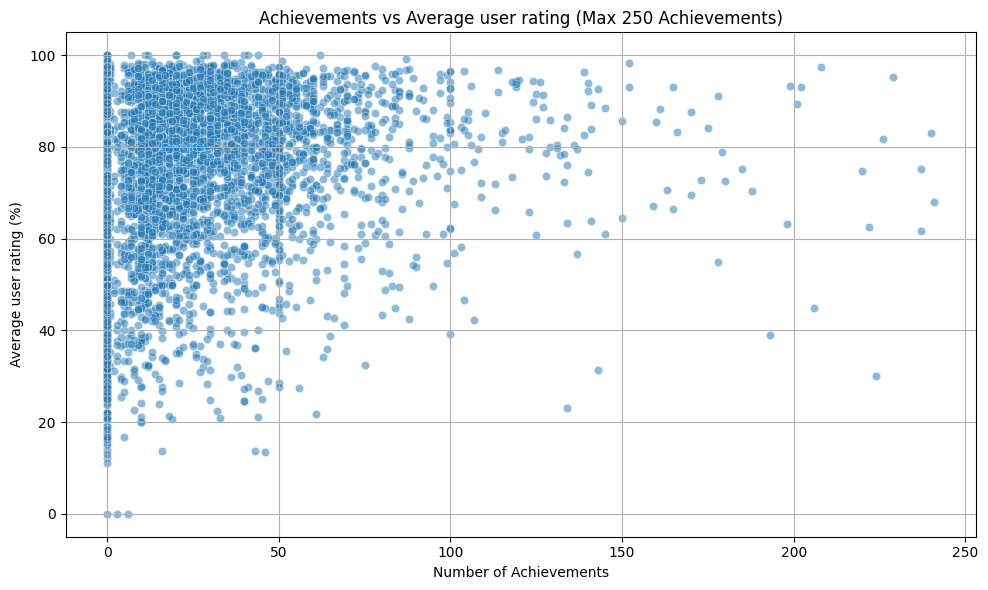

In [ ]:
filtered_achievements = df[df['achievements'] < 250]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_achievements, x='achievements', y='rating_percentage', alpha=0.5)
plt.title("Achievements vs Average user rating (Max 250 Achievements)")
plt.xlabel("Number of Achievements")
plt.ylabel("Average user rating (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


There appears to be a bit higher rating for games with lots of achievements. This could be because you have more reasons to play, and keep playing. However, there is way more data on games with few achievements, so this can overshadow it. 

## 🏢 Publisher vs. User Ratings

We analyze how different publishers are rated by users. Only the top 10 most frequent publishers are shown.


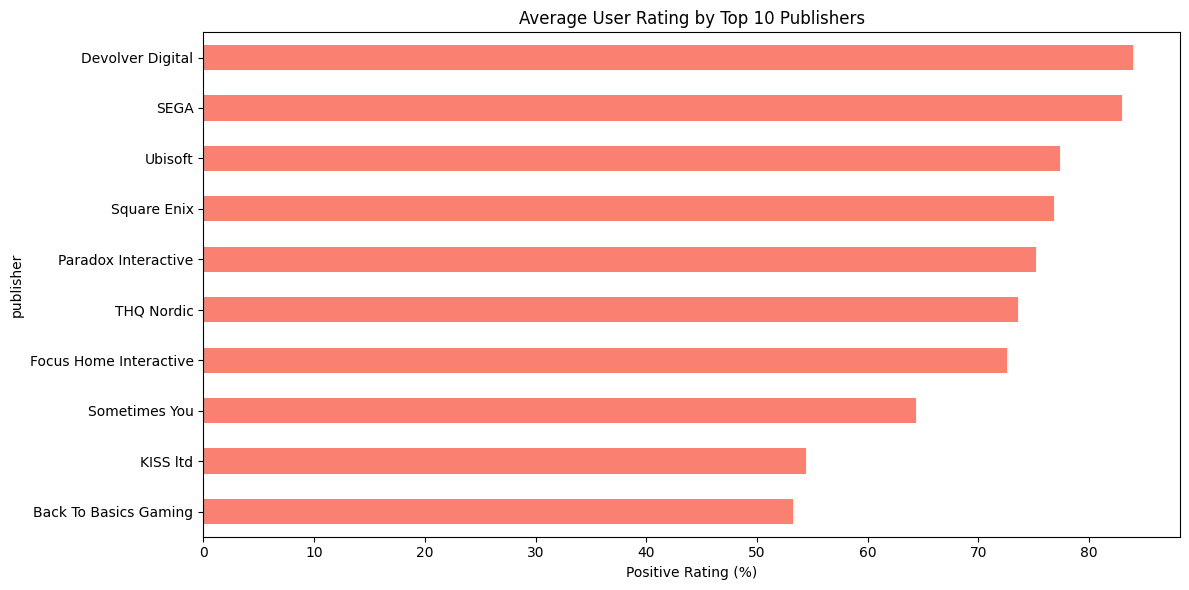

In [ ]:
top_publishers = df['publisher'].value_counts().head(10).index
publisher_ratings = df[df['publisher'].isin(top_publishers)].groupby('publisher')['rating_percentage'].mean()

plt.figure(figsize=(12, 6))
publisher_ratings.sort_values().plot(kind='barh', color='salmon')
plt.title("Average User Rating by Top 10 Publishers")
plt.xlabel("Positive Rating (%)")
plt.tight_layout()
plt.show()


## 📊 Final Summary: What Affects User Ratings the Most?

In this final overview, we visualize how strongly different variables correlate with `rating_percentage`.  
This helps us understand which features are most associated with higher (or lower) user review scores.


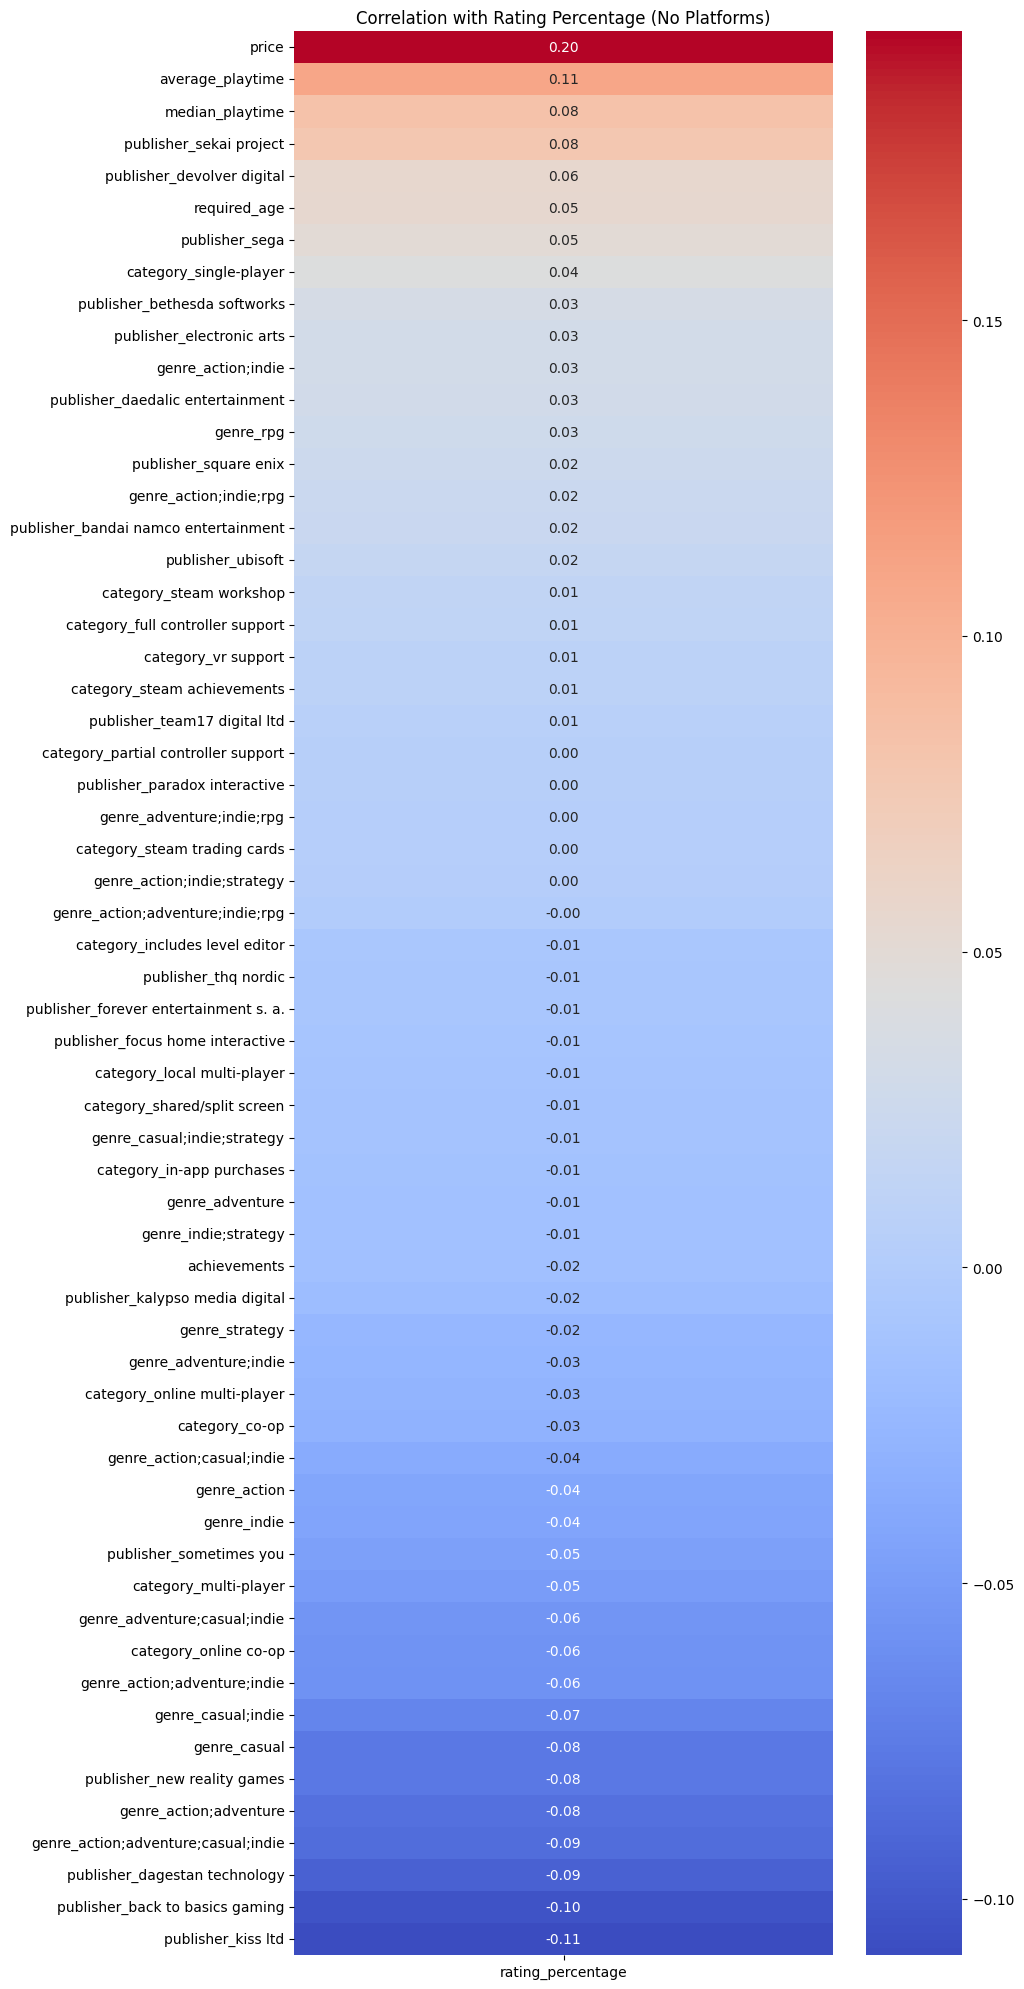

In [ ]:
# STEP 1: Create genre flags for top 5 genres
top_genres = df['genres'].value_counts().head(20).index

for genre in top_genres:
    df[f'genre_{genre.lower()}'] = df['genres'].str.contains(
        genre, case=False
    )

top_categories = df['primary_category'].value_counts().head(20).index

for category in top_categories:
    df[f'category_{category.lower()}'] = df['primary_category'] \
        .str.contains(category, case=False)

top_publishers = df['publisher'].value_counts().head(20).index

for publisher in top_publishers:
    df[f'publisher_{publisher.lower()}'] = df['publisher'].str.contains(
        publisher, case=False
    )

# STEP 2: Define correlation variables (excluding platform flags)
corr_vars = [
    'price', 'required_age', 'achievements',
    'average_playtime', 'median_playtime',
    'rating_percentage'
] + [f'genre_{g.lower()}' for g in top_genres] + \
    [f'category_{c.lower()}' for c in top_categories] + \
    [f'publisher_{p.lower()}' for p in top_publishers]

# STEP 3: Compute correlation matrix and extract rating row
correlation_matrix = df[corr_vars].corr()
rating_corr = correlation_matrix[['rating_percentage']] \
    .drop(index='rating_percentage')

# STEP 4: Plot
plt.figure(figsize=(10, 20))
sns.heatmap(
    rating_corr.sort_values(
        by='rating_percentage', ascending=False
    ),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title("Correlation with Rating Percentage (No Platforms)")
plt.tight_layout()
plt.show()



At last, price appears to be the most correlating factor. The price of a game influences the expectations of players. The more expensive a game is, the more people expect it to be of high quality. If a game does not meet that expectation, it can lead to lower ratings.